# Dataset | Problem

Context

Attribute Information

Data vocabulary:

    3 (age): age in years
    4 (sex): sex 1 = male; 
                 0 = female
    9 (cp): cp: chest pain type 0: typical angina;
                                1: atypical angina;
                                2: non-anginal pain;
                                3: asymptomatic
    10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
    12 (chol): serum cholestoral in mg/dl
    16 (fbs): (fasting blood sugar > 120 mg/dl) 1 = true; 
                                                0 = false
    19 (restecg): resting electrocardiographic results 
                 0: normal;
                 1: having ST-T wave abnormality 
    (T wave inversions and/or ST elevation or depression of > 0.05 mV);
                 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    32 (thalach): maximum heart rate achieved
    38 (exang): exercise induced angina 1 = yes; 
                                        0 = no
    40 (oldpeak): ST depression induced by exercise relative to rest
    41 (slope): the slope of the peak exercise ST segment   1: upsloping; 
                                                            2: flat; 
                                                            3: downsloping
    44 (ca): number of major vessels (0-3) colored by flourosopy
    51 (thal): 3 = normal; 
               6 = fixed defect; 
               7 = reversable defect
    58 (num) (the predicted attribute): 0: < 50% diameter narrowing 
                                        1: > 50% diameter narrowing
    
    Note: 
    thal: A blood disorder called thalassemia 0: NULL (dropped from the dataset previously;
                            1: fixed defect (no blood flow in some part of the heart);
                            2: normal blood flow;
                            3: reversible defect (a blood flow is observed but it is not normal);

Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

# Import Libraries

In [1]:
# 1-Import Libraies

#!pip install lightgbm
#!pip install catboost

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Model Selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold, cross_val_predict

#Feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBClassifier
from xgboost import plot_importance

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.neural_network import MLPRegressor

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Useful Functions

In [2]:
def get_classification_report(y_test, y_test_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_test_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    #df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [3]:
def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

# Load | Read Data

In [4]:
# 2-Load|Read Data
csv_path = "heart.csv"
df0 = pd.read_csv(csv_path)
df = df0.copy() 

df.head()
df.info()
df.shape
df.nunique()
df.isnull().sum()
df.describe().T
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
df.isnull().sum()
#miss_val = []
#[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Exploratory Data Analysis and Visualization

## Features | Target

In [13]:
# 3-Target Examination
target = "target"

df.duplicated(subset=None, keep='first').sum()
df.drop_duplicates(keep = 'first', inplace = True)

# df = df.dropna()

X_columns = df.drop(target, axis=1).columns
X_categorical = df.drop(target, axis=1).select_dtypes('object')
X_numerical = df.drop(target, axis=1).select_dtypes('number').astype('float64')

df[target].value_counts()

1    164
0    138
Name: target, dtype: int64

In [14]:
X_columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [15]:
X_numerical.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [16]:
X_categorical.columns

Index([], dtype='object')

In [17]:
df[target].value_counts()

1    164
0    138
Name: target, dtype: int64

## Numerical Features

In [18]:
X_numerical.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [19]:
# 5-Exploratory Data Analysis and Visualization with Seaborn

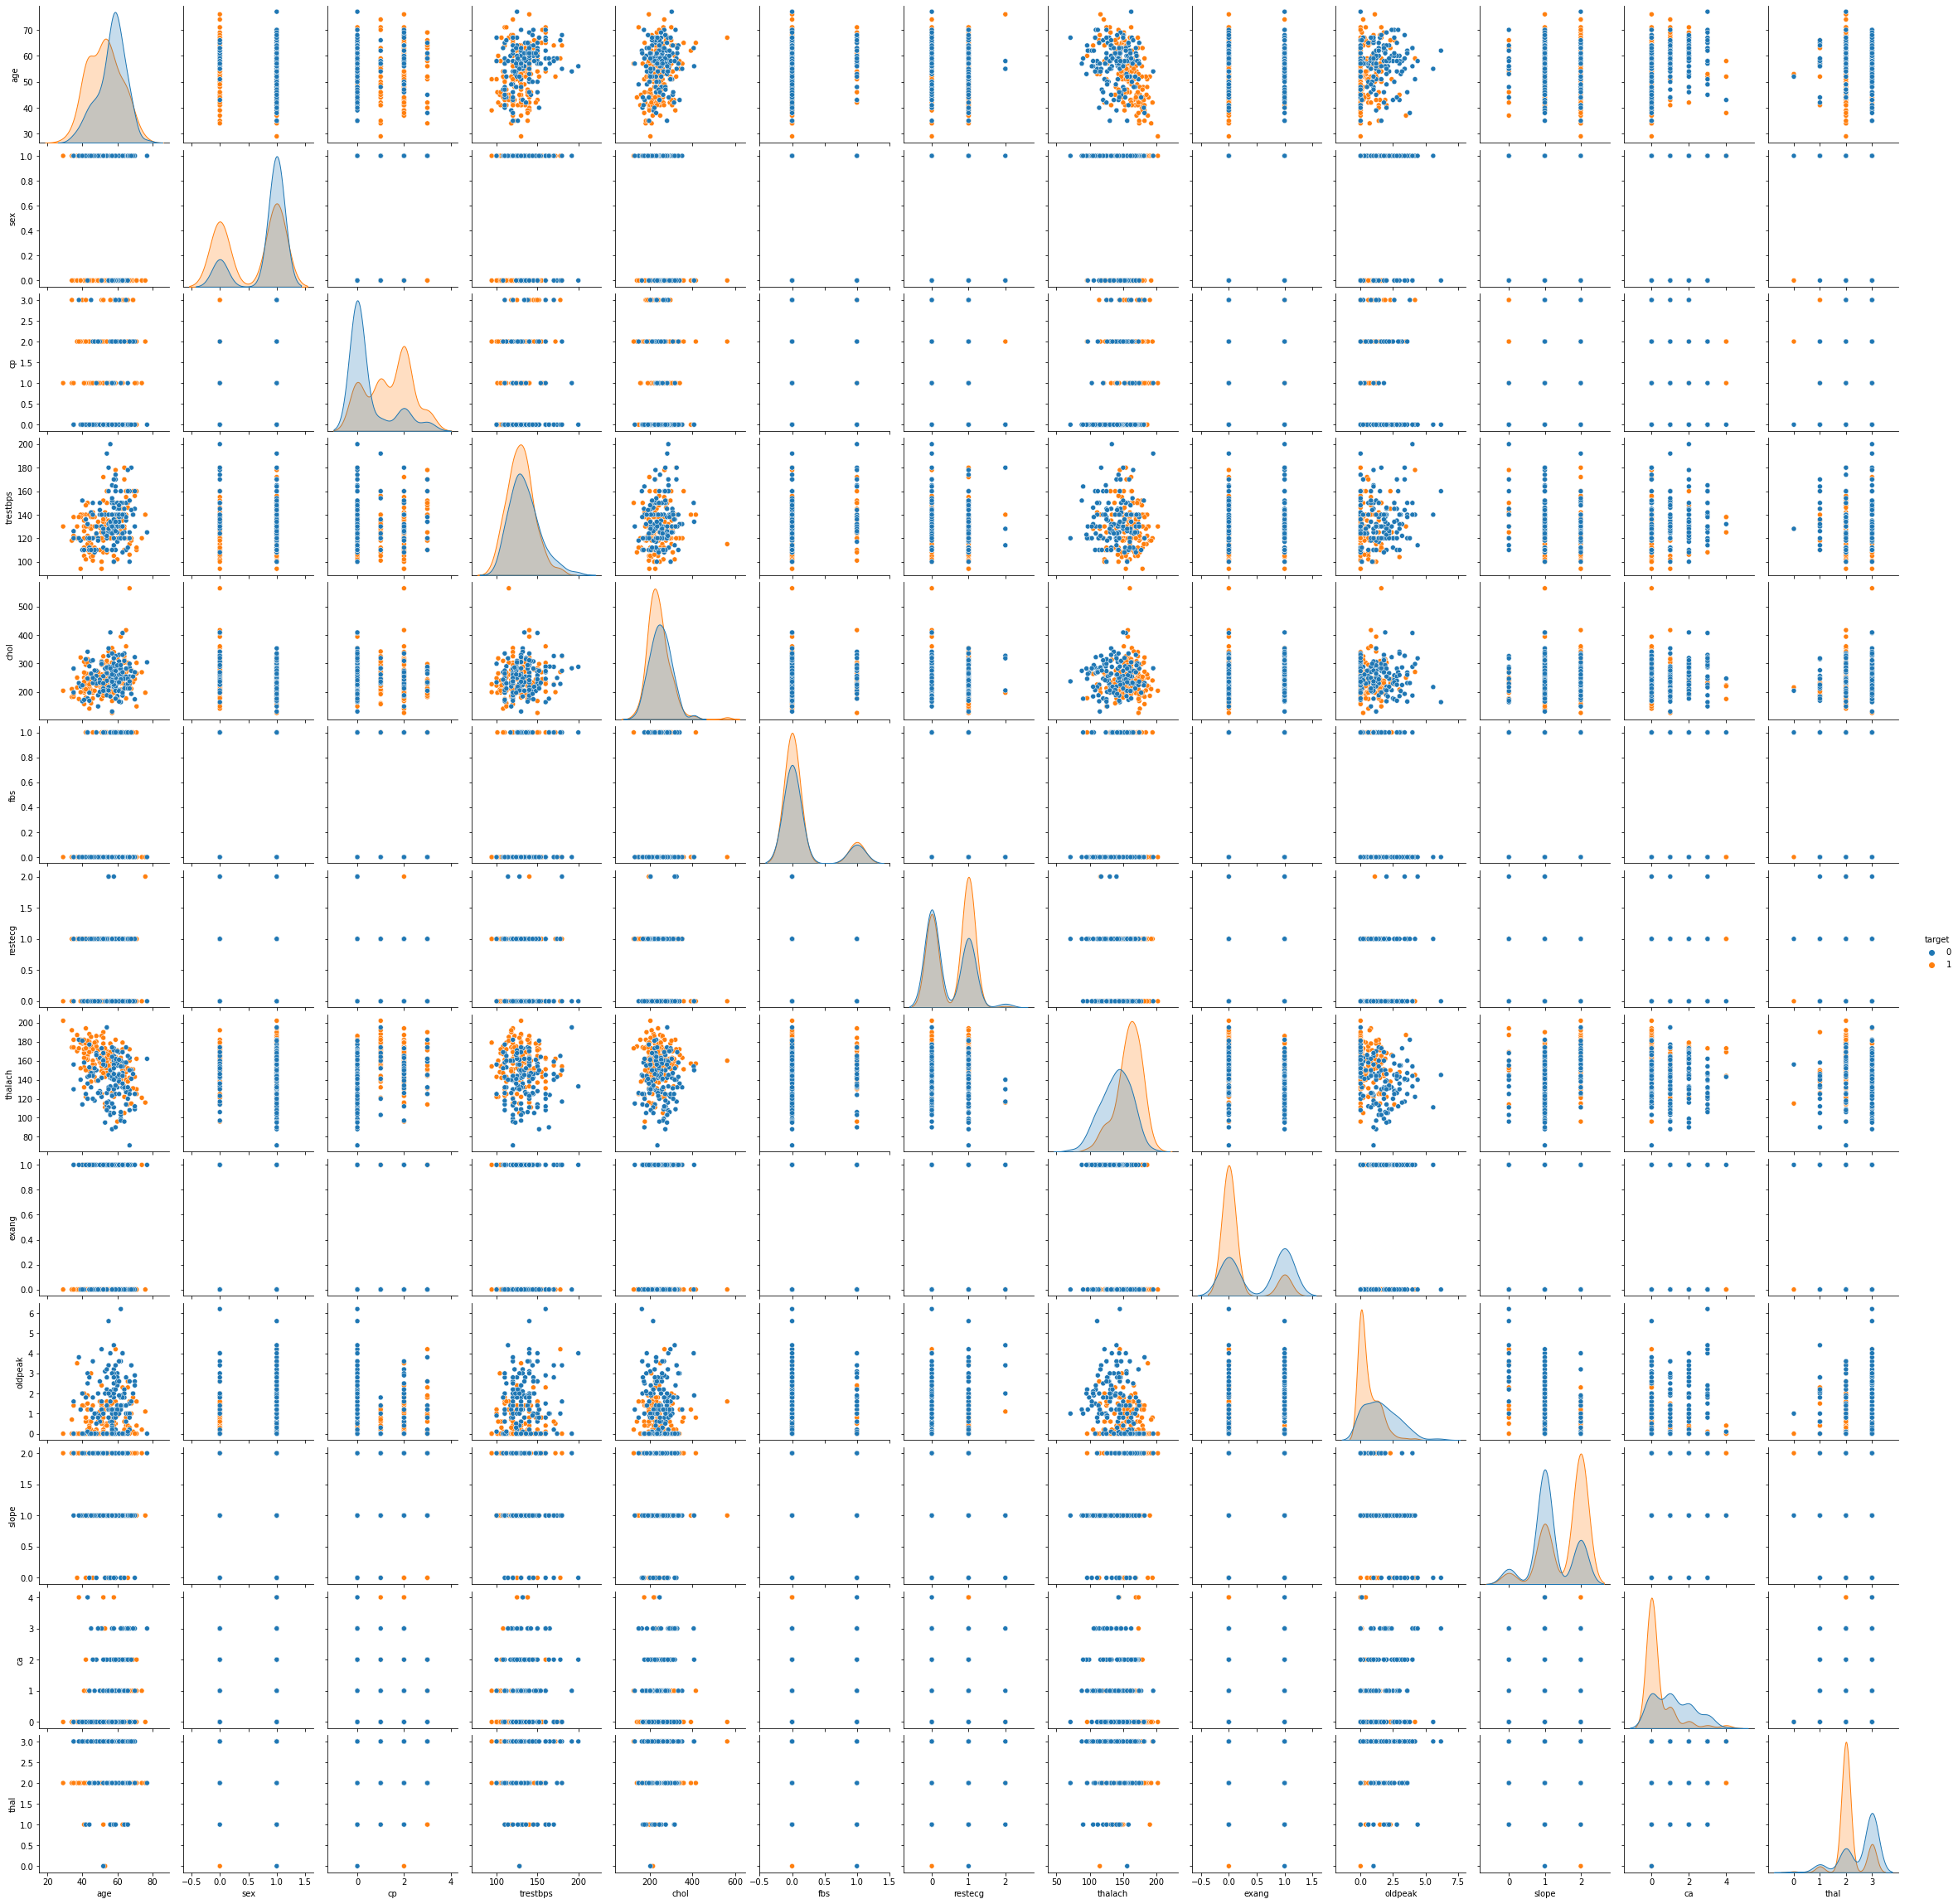

In [20]:
sns.pairplot(df, hue=target);

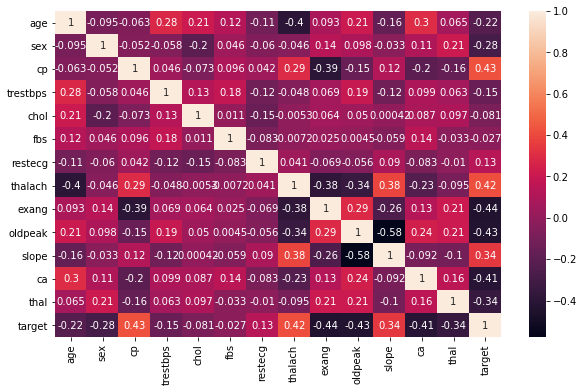

In [21]:
sns.heatmap(df.corr(), annot=True);

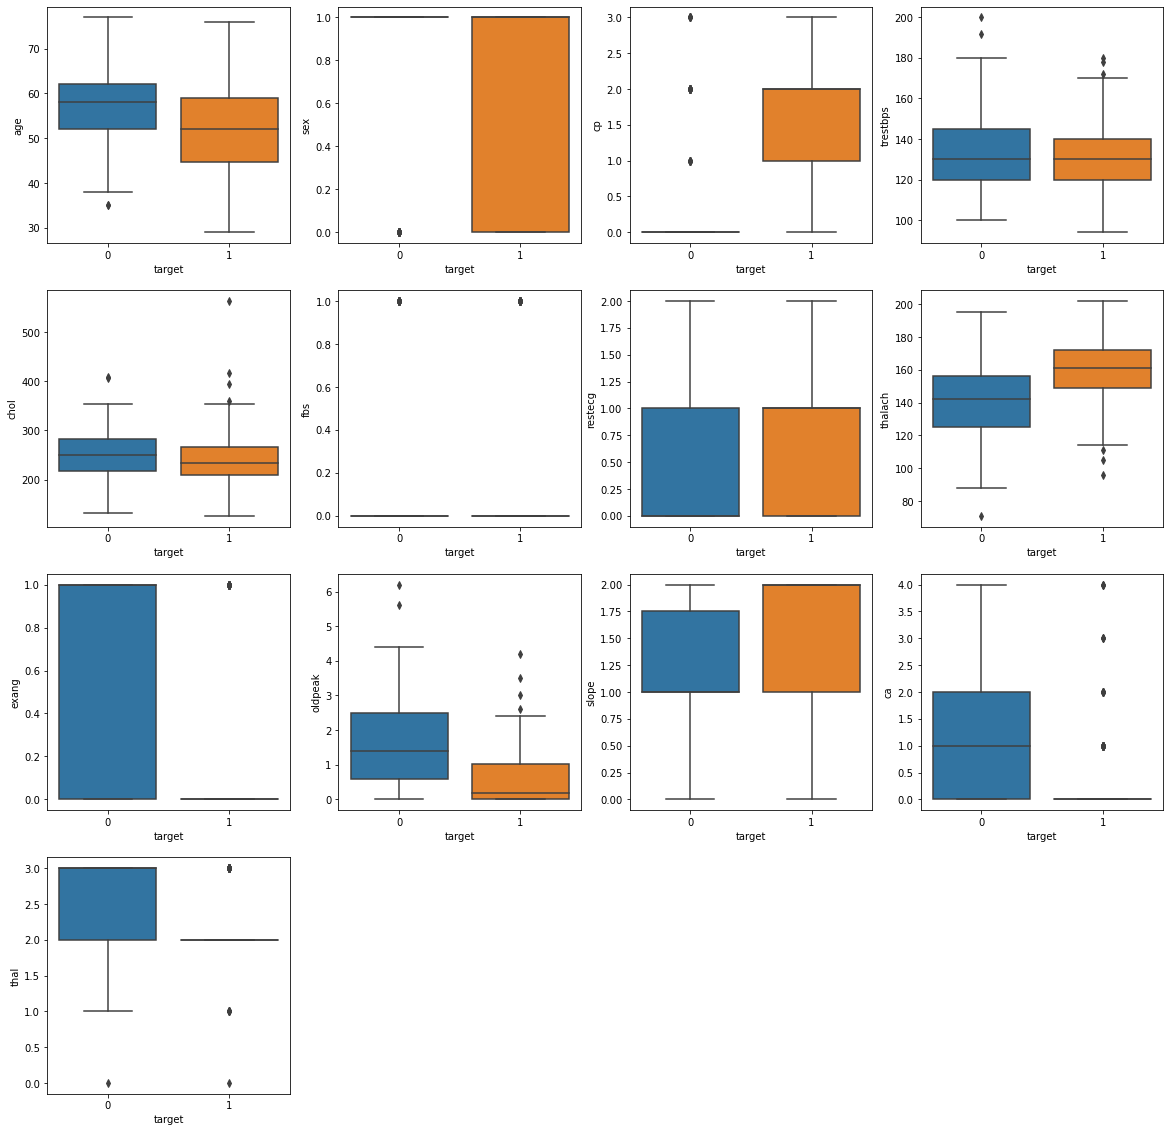

In [22]:
index = 0
plt.figure(figsize=(20,20))
for feature in X_numerical.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

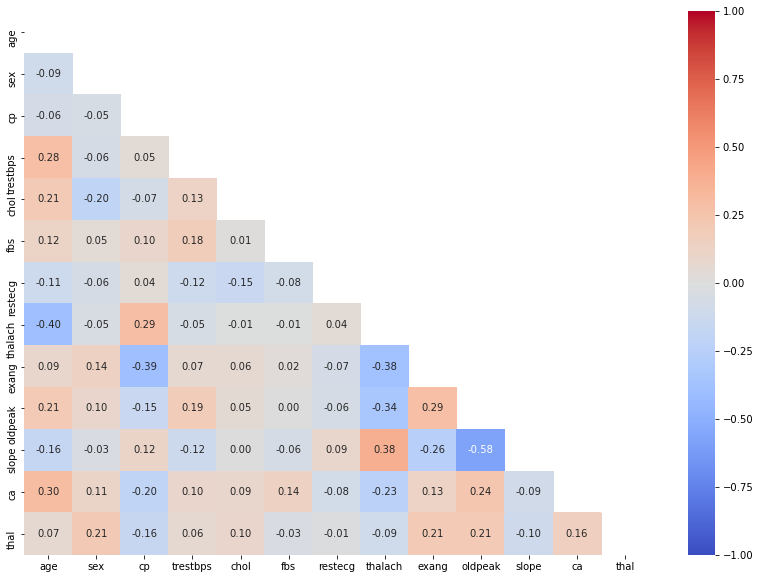

In [23]:
X_numerical_= X_numerical
matrix = np.triu(X_numerical_.corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (X_numerical_.corr(), annot=True, 
             fmt= '.2f', vmin=-1, vmax=1, center=0, 
             cmap='coolwarm',mask=matrix, ax=ax);

In [24]:
# 6-Exploratory Data Analysis and Visualization with Plotly
X_numerical.iplot(kind='hist');
X_numerical.iplot(kind='histogram', subplots=True, bins=50);

In [25]:
X_numerical.iplot(kind='hist');

In [26]:
X_numerical.iplot(kind='histogram', subplots=True, bins=50);

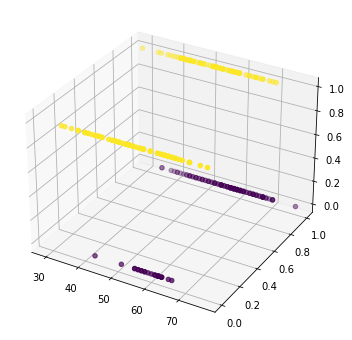

In [27]:
# 7-Exploratory Data Analysis and Visualization with Axes3D 
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[X_numerical.columns[0]],df[X_numerical.columns[1]],df[target],c=df[target]);
#"3d matplotlib scatter plot" https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

In [28]:
# 8-Exploratory Data Analysis and Visualization with Plotly3D
#!pip install plotly
# https://plotly.com/python/3d-scatter-plots/
import plotly.express as px
fig = px.scatter_3d(df, x=X_numerical.columns[0], y=X_numerical.columns[1], z=target,
              color=target)
fig.show();

## Skewness Control

In [29]:
# 9-Skewness Control
skew_limit = 0.75 
# This is our threshold-limit to evaluate skewness. 
# Overall below abs(1) seems acceptable for the linear models. 
skew_vals = X_numerical.skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

fbs        1.981
ca         1.296
oldpeak    1.266
chol       1.147
sex       -0.786
dtype: float64

In [30]:
X_numerical[skew_cols.index].iplot(kind='hist');

In [31]:
X_numerical[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

In [32]:
### With Power Transformer
df_trans = df[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

fbs        1.981
ca         0.430
oldpeak    0.122
chol      -0.006
sex       -0.786
dtype: float64



In [33]:
df_trans.shape

(302, 5)

In [34]:
df_trans.columns

Index(['fbs', 'ca', 'oldpeak', 'chol', 'sex'], dtype='object')

In [35]:
df_trans.drop('fbs', axis=1, inplace = True)

In [36]:
df_trans.shape

(302, 4)

In [37]:
df.shape

(302, 14)

In [38]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
df.drop(['fbs', 'ca', 'oldpeak', 'chol', 'sex'], axis=1, inplace=True)

In [40]:
df.shape

(302, 9)

In [41]:
df = pd.concat([df, df_trans], axis=1)

In [42]:
df.shape

(303, 13)

In [43]:
# 9-Skewness Control
skew_limit = 0.75 
# This is our threshold-limit to evaluate skewness. 
# Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

sex   -0.786
dtype: float64

# Model Selection

## Train | Test Split

In [44]:
df.shape

(303, 13)

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum()

age         0
cp          0
trestbps    0
restecg     0
thalach     0
exang       0
slope       0
thal        0
target      0
ca          0
oldpeak     0
chol        0
sex         0
dtype: int64

In [102]:
# 3 Train|Test Split, Dummy 
if (df.dtypes==object).any():
    dummied = pd.get_dummies(X_categorical, drop_first=True)
    X = pd.concat([X_numerical, dummied[dummied.columns]], axis=1)
    
else:
    X = df.drop(target, axis=1).astype('float64')

y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [103]:
shape_control()

df.shape: (301, 13)
X.shape: (301, 12)
y.shape: (301,)
X_train.shape: (210, 12)
y_train.shape: (210,)
X_test.shape: (91, 12)
y_test.shape: (91,)


In [104]:
X.head()

,age,cp,trestbps,restecg,thalach,exang,slope,thal,ca,oldpeak,chol,sex
0,63.000,3.000,145.000,0.000,150.000,0.000,0.000,1.000,-0.837,1.178,-0.165,0.683
1,37.000,2.000,130.000,1.000,187.000,0.000,0.000,2.000,-0.837,1.592,0.182,0.683
2,41.000,1.000,130.000,0.000,172.000,0.000,2.000,2.000,-0.837,0.682,-0.827,-1.465
3,56.000,1.000,120.000,1.000,178.000,0.000,2.000,2.000,-0.837,0.161,-0.102,0.683
4,57.000,0.000,120.000,1.000,163.000,1.000,2.000,2.000,-0.837,-0.075,1.860,-1.465


In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
X.isnull().sum()

age         0
cp          0
trestbps    0
restecg     0
thalach     0
exang       0
slope       0
thal        0
ca          0
oldpeak     0
chol        0
sex         0
dtype: int64

## Implement Logistic Regression and Evaluate¶

In [109]:
log_model = LogisticRegression()
log_params = {"penalty" : ["l2"],
             "l1_ratio" : np.linspace(0, 1, 20),
             "C" : np.logspace(0, 10, 20)}
log_gridCV = GridSearchCV(log_model, log_params).fit(X_train_scaled, y_train)

penalty, l1_ratio, C = log_gridCV.best_params_["penalty"], log_gridCV.best_params_["l1_ratio"], log_gridCV.best_params_["C"]

log_tuned = LogisticRegression(penalty = penalty, C = C, l1_ratio = l1_ratio, max_iter=5000).fit(X_train_scaled, y_train)

y_test_pred = log_tuned.predict(X_test_scaled)

print("best_score:", log_gridCV.best_score_, '\n')
print('penalty:', penalty,'\nC:', C,'\nl1_ratio:', l1_ratio, '\n')
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

log_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
log_conf_matrix.columns = pd.MultiIndex.from_product([log_conf_matrix.columns, ['for log']])

log = get_classification_report(y_test, y_test_pred)
log.columns = pd.MultiIndex.from_product([log.columns, ['for log']])
print('confusion_matrix:\n\n', log_conf_matrix, '\n\n')
print('classification_report:\n\n', log)

best_score: 0.8857142857142856 

penalty: l2 
C: 127.42749857031335 
l1_ratio: 0.0 

accuracy: 0.7912087912087912
rmse: 0.4569367667316877 


confusion_matrix:

         0       1
  for log for log
0      28      12
1       7      44 


classification_report:

              precision  recall f1-score support
               for log for log  for log for log
0.0              0.800   0.700    0.747  40.000
1.0              0.786   0.863    0.822  51.000
accuracy         0.791   0.791    0.791   0.791
macro avg        0.793   0.781    0.785  91.000
weighted avg     0.792   0.791    0.789  91.000


In [112]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

<IPython.core.display.Javascript object>


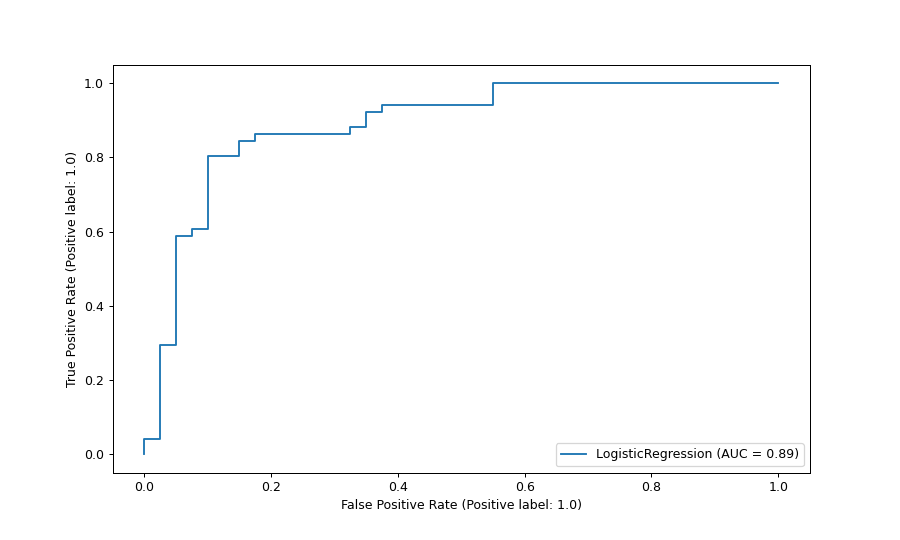

In [113]:
plot_roc_curve(log_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


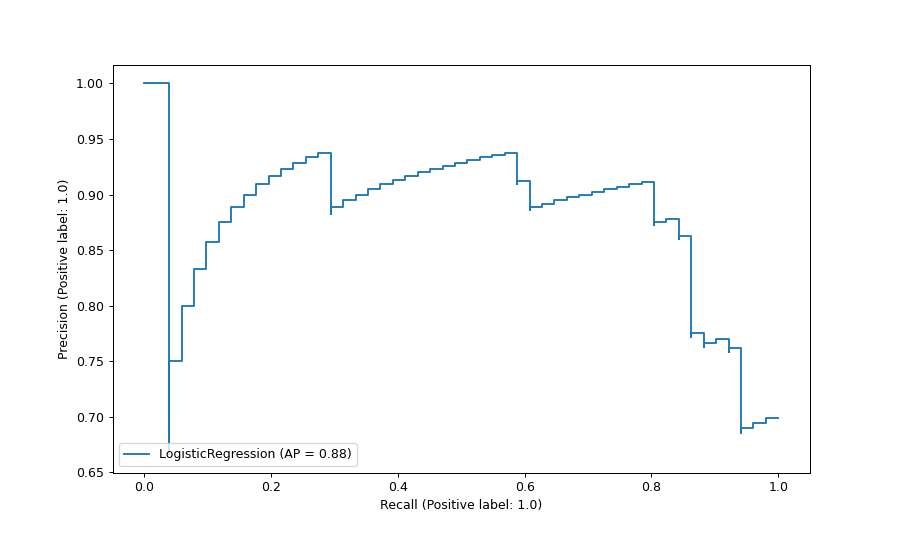

In [114]:
plot_precision_recall_curve(log_tuned, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [115]:
# KNN Classification
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1, 50)}
knn_gridCV = GridSearchCV(knn_model, knn_params, cv = 10).\
                      fit(X_train_scaled, y_train)

k_best =knn_gridCV.best_params_["n_neighbors"]

knn_tuned = KNeighborsClassifier(n_neighbors = k_best).fit(X_train_scaled, y_train)
y_test_pred = knn_tuned.predict(X_test_scaled)


print("best_score:", knn_gridCV.best_score_, '\n')
print('K:', k_best)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

knn_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
knn_conf_matrix.columns = pd.MultiIndex.from_product([knn_conf_matrix.columns, ['for knn']])

knn = get_classification_report(y_test, y_test_pred)
knn.columns = pd.MultiIndex.from_product([knn.columns, ['for knn']])
print('confusion_matrix:\n\n', knn_conf_matrix, '\n\n')
print('classification_report:\n\n', knn)

knn_conf_matrix1 = knn_conf_matrix
knn1 = knn 

best_score: 0.8761904761904761 

K: 42
accuracy: 0.7802197802197802
rmse: 0.4688072309384954 


confusion_matrix:

         0       1
  for knn for knn
0      30      10
1      10      41 


classification_report:

              precision  recall f1-score support
               for knn for knn  for knn for knn
0.0              0.750   0.750    0.750  40.000
1.0              0.804   0.804    0.804  51.000
accuracy         0.780   0.780    0.780   0.780
macro avg        0.777   0.777    0.777  91.000
weighted avg     0.780   0.780    0.780  91.000


<IPython.core.display.Javascript object>


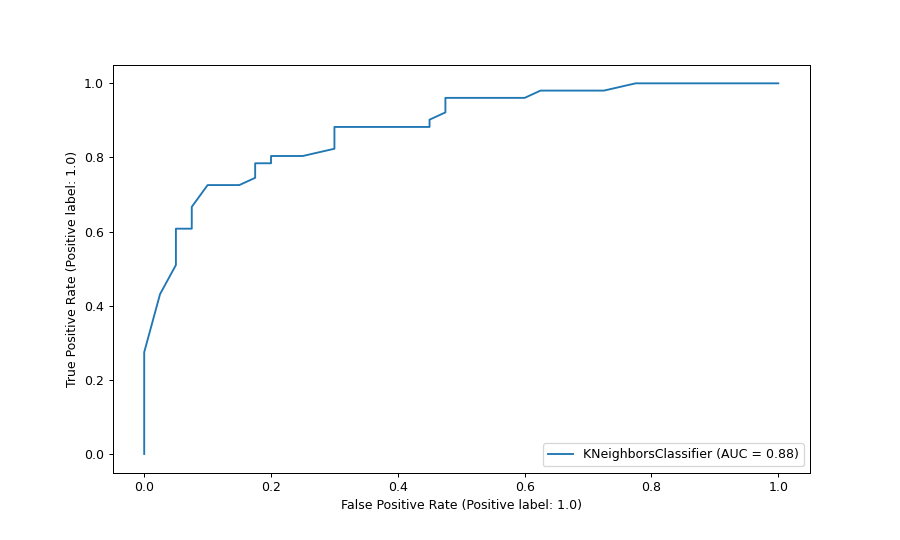

In [118]:
plot_roc_curve(knn_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


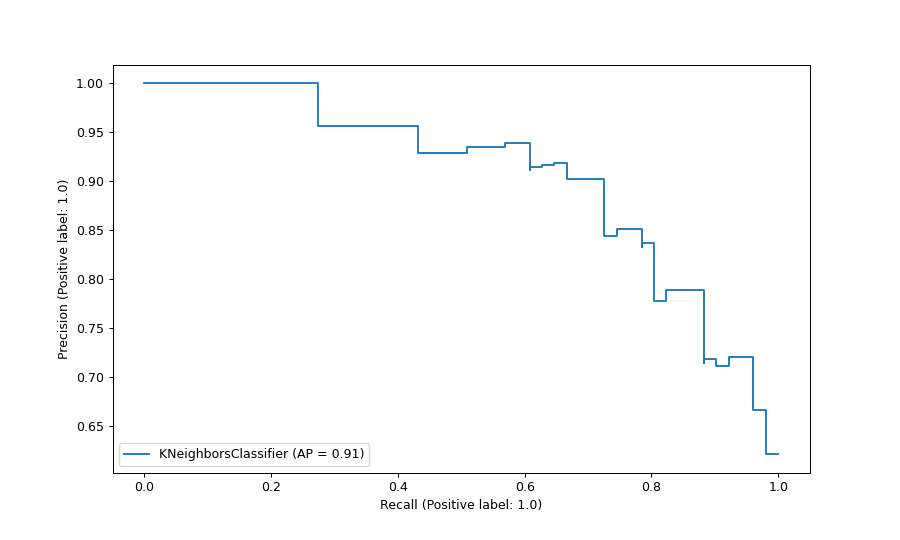

In [119]:
plot_precision_recall_curve(knn_tuned, X_test_scaled, y_test);

In [120]:
# KNN Classification
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1, 50), "p": [1,2]}
knn_gridCV = GridSearchCV(knn_model, knn_params, cv = 10).\
                      fit(X_train_scaled, y_train)

k_best =knn_gridCV.best_params_["n_neighbors"]

knn_tuned = KNeighborsClassifier(n_neighbors = k_best).fit(X_train_scaled, y_train)
y_test_pred = knn_tuned.predict(X_test_scaled)

print("best_score:", knn_gridCV.best_score_, '\n')
print('K:', k_best)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

knn_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
knn_conf_matrix.columns = pd.MultiIndex.from_product([knn_conf_matrix.columns, ['for knn']])

knn = get_classification_report(y_test, y_test_pred)
knn.columns = pd.MultiIndex.from_product([knn.columns, ['for knn']])
print('confusion_matrix:\n\n', knn_conf_matrix, '\n\n')
print('classification_report:\n\n', knn)

knn_conf_matrix2 = knn_conf_matrix
knn2 = knn 

best_score: 0.8904761904761905 

K: 37
accuracy: 0.7802197802197802
rmse: 0.4688072309384954 


confusion_matrix:

         0       1
  for knn for knn
0      30      10
1      10      41 


classification_report:

              precision  recall f1-score support
               for knn for knn  for knn for knn
0.0              0.750   0.750    0.750  40.000
1.0              0.804   0.804    0.804  51.000
accuracy         0.780   0.780    0.780   0.780
macro avg        0.777   0.777    0.777  91.000
weighted avg     0.780   0.780    0.780  91.000


<IPython.core.display.Javascript object>


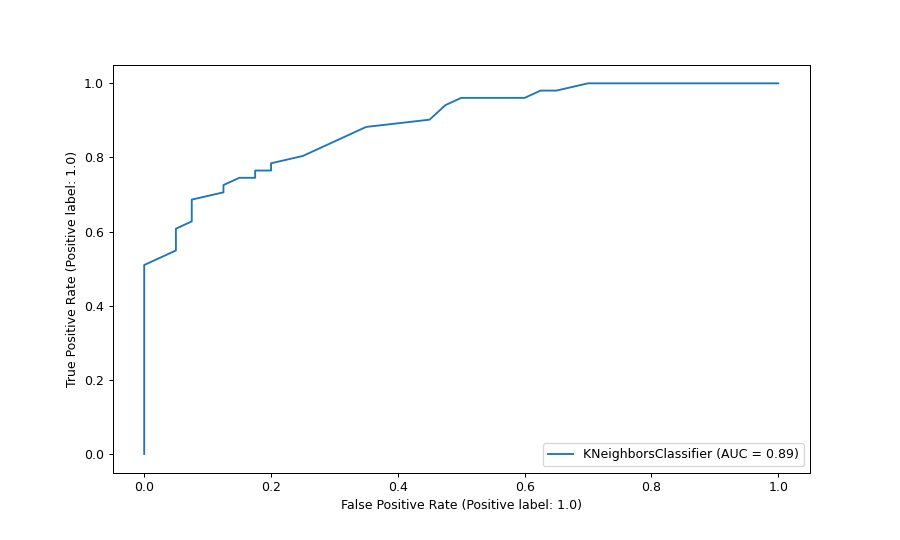

In [121]:
plot_roc_curve(knn_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


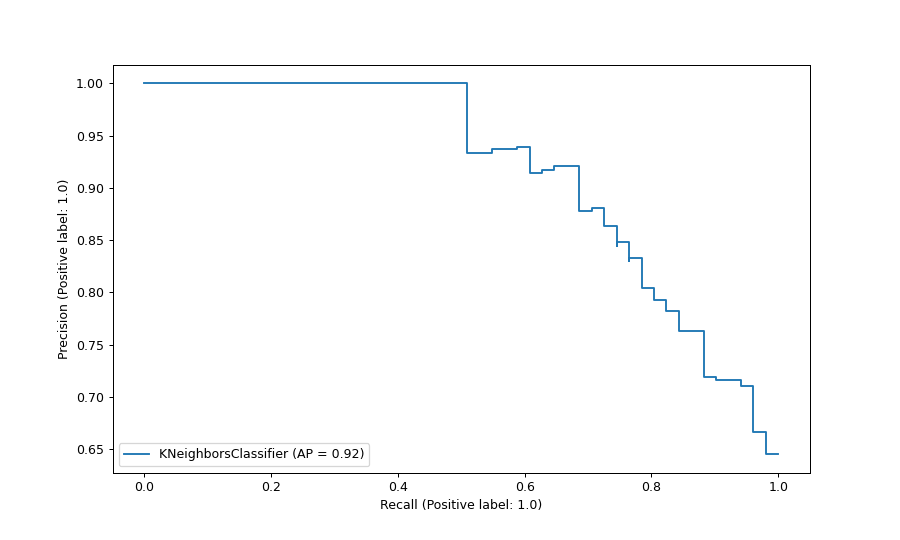

In [122]:
plot_precision_recall_curve(knn_tuned, X_test_scaled, y_test);

In [123]:
# KNN Classification
knn_model = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1, 50), "p": [1,2], "weights": ['uniform', "distance"]}
knn_gridCV = GridSearchCV(knn_model, knn_params, cv = 10).\
                      fit(X_train_scaled, y_train)

k_best =knn_gridCV.best_params_["n_neighbors"]

knn_tuned = KNeighborsClassifier(n_neighbors = k_best).fit(X_train_scaled, y_train)
y_test_pred = knn_tuned.predict(X_test_scaled)

print("best_score:", knn_gridCV.best_score_, '\n')
print('K:', k_best)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

knn_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
knn_conf_matrix.columns = pd.MultiIndex.from_product([knn_conf_matrix.columns, ['for knn']])

knn = get_classification_report(y_test, y_test_pred)
knn.columns = pd.MultiIndex.from_product([knn.columns, ['for knn']])
print('confusion_matrix:\n\n', knn_conf_matrix, '\n\n')
print('classification_report:\n\n', knn)

knn_conf_matrix3 = knn_conf_matrix
knn3 = knn 

best_score: 0.8904761904761905 

K: 37
accuracy: 0.7802197802197802
rmse: 0.4688072309384954 


confusion_matrix:

         0       1
  for knn for knn
0      30      10
1      10      41 


classification_report:

              precision  recall f1-score support
               for knn for knn  for knn for knn
0.0              0.750   0.750    0.750  40.000
1.0              0.804   0.804    0.804  51.000
accuracy         0.780   0.780    0.780   0.780
macro avg        0.777   0.777    0.777  91.000
weighted avg     0.780   0.780    0.780  91.000


<IPython.core.display.Javascript object>


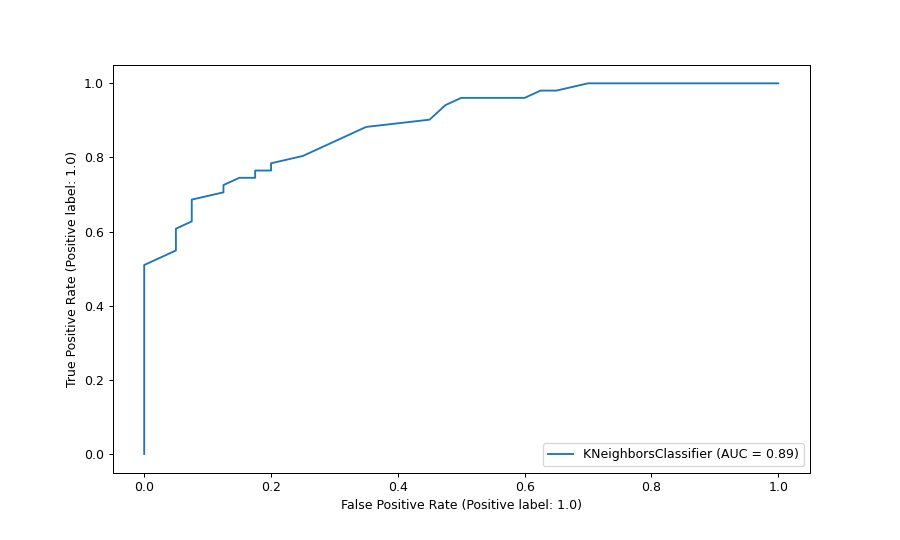

In [124]:
plot_roc_curve(knn_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


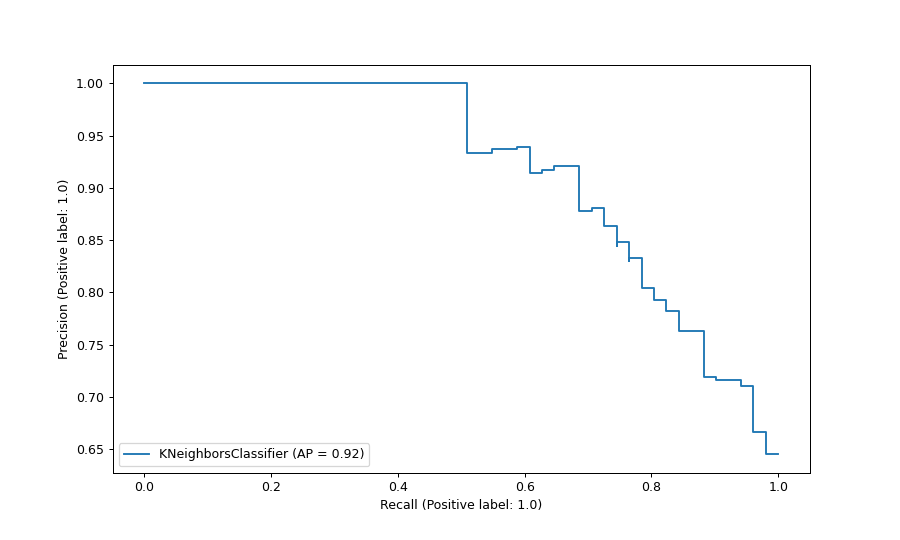

In [125]:
plot_precision_recall_curve(knn_tuned, X_test_scaled, y_test);

# Implement SVC and Evaluate

In [126]:
# SVM Classification
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
svm_params = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

svm_gridCV = GridSearchCV(svm_model, svm_params, verbose=3, refit=True).\
                    fit(X_train_scaled, y_train)

C, gamma, kernel = svm_gridCV.best_params_["C"], svm_gridCV.best_params_["gamma"], svm_gridCV.best_params_["kernel"]

svm_tuned = SVC(C = C, gamma = gamma, kernel = kernel).fit(X_train_scaled, y_train)

y_test_pred = svm_tuned.predict(X_test_scaled)


print("best_score:", svm_gridCV.best_score_, '\n')
print('C:', C, 'gamma:', gamma, 'kernel:', kernel)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

svm_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
svm_conf_matrix.columns = pd.MultiIndex.from_product([svm_conf_matrix.columns, ['for svm']])

svm = get_classification_report(y_test, y_test_pred)
svm.columns = pd.MultiIndex.from_product([svm.columns, ['for svm']])
print('confusion_matrix:\n\n', svm_conf_matrix, '\n\n')
print('classification_report:\n\n', svm)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.881 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.786 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.929 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.881 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.881 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.881 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.786 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.929 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.857 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.810 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.524 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.524 total time=   0.0s
[CV 3/5] END ......C=1, gamm

[CV 5/5] END .C=100, gamma=scale, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END ..C=100, gamma=auto, kernel=linear;, score=0.905 total time=   0.0s
[CV 2/5] END ..C=100, gamma=auto, kernel=linear;, score=0.881 total time=   0.0s
[CV 3/5] END ..C=100, gamma=auto, kernel=linear;, score=0.881 total time=   0.0s
[CV 4/5] END ..C=100, gamma=auto, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END ..C=100, gamma=auto, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 2/5] END ........C=100, 

[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.881 total time=   0.1s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.881 total time=   0.4s
[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.881 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.905 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.881 total time=   0.1s
[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.881 total time=   0.6s
[CV 4/5] END C=1000, gamma=0

In [127]:
print("best_score:", svm_gridCV.best_score_, '\n')
print('C:', C, 'gamma:', gamma, 'kernel:', kernel)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

svm_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
svm_conf_matrix.columns = pd.MultiIndex.from_product([svm_conf_matrix.columns, ['for svm']])

svm = get_classification_report(y_test, y_test_pred)
svm.columns = pd.MultiIndex.from_product([svm.columns, ['for svm']])
print('confusion_matrix:\n\n', svm_conf_matrix, '\n\n')
print('classification_report:\n\n', svm)

best_score: 0.8809523809523808 

C: 1000 gamma: 0.001 kernel: rbf
accuracy: 0.7912087912087912
rmse: 0.4569367667316877 


confusion_matrix:

         0       1
  for svm for svm
0      28      12
1       7      44 


classification_report:

              precision  recall f1-score support
               for svm for svm  for svm for svm
0.0              0.800   0.700    0.747  40.000
1.0              0.786   0.863    0.822  51.000
accuracy         0.791   0.791    0.791   0.791
macro avg        0.793   0.781    0.785  91.000
weighted avg     0.792   0.791    0.789  91.000


<IPython.core.display.Javascript object>


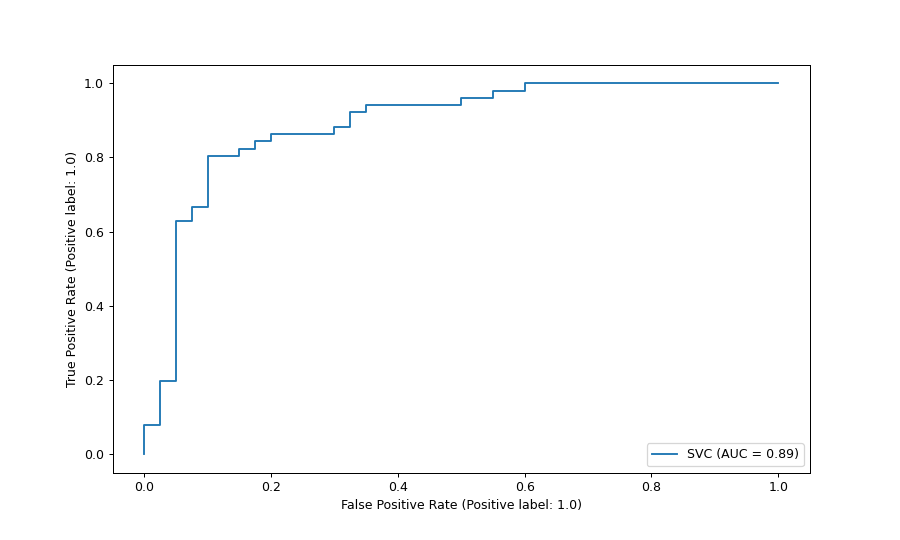

In [128]:
plot_roc_curve(svm_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


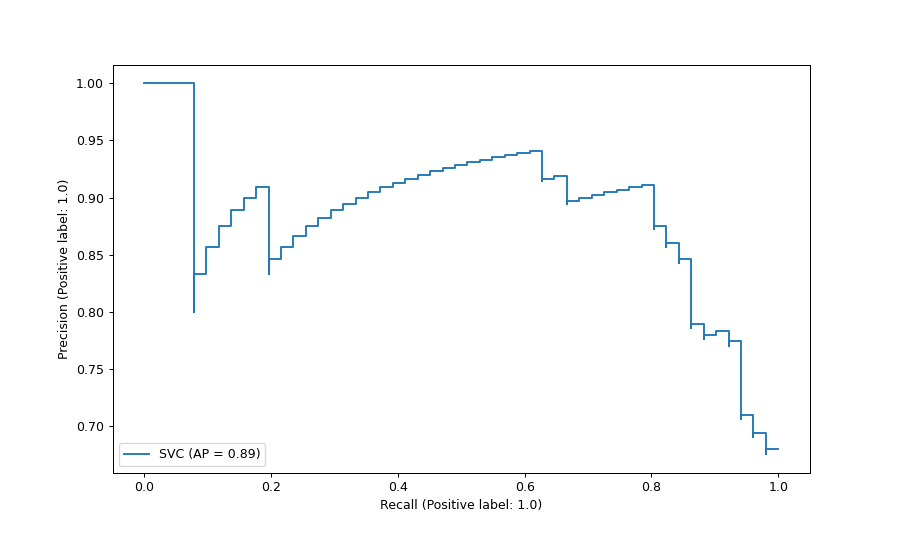

In [129]:
plot_precision_recall_curve(svm_tuned, X_test_scaled, y_test);

## Implement CART and Evaluate

In [130]:
# CART Classification
cart_model = DecisionTreeClassifier()
cart_params = {"max_depth": range(1,10), "min_samples_split" : list(range(2,50))}

cart_gridCV = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

max_depth, min_samples_split = cart_gridCV.best_params_["max_depth"], cart_gridCV.best_params_["min_samples_split"]

cart_tuned = DecisionTreeClassifier(max_depth = max_depth, 
                                   min_samples_split = min_samples_split).fit(X_train_scaled, y_train)

y_test_pred = cart_tuned.predict(X_test_scaled)

print("best_score:", cart_gridCV.best_score_, '\n')
print('max_depth:', max_depth, 'min_samples_split:', min_samples_split)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

cart_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
cart_conf_matrix.columns = pd.MultiIndex.from_product([cart_conf_matrix.columns, ['for cart']])

cart = get_classification_report(y_test, y_test_pred)
cart.columns = pd.MultiIndex.from_product([cart.columns, ['for cart']])
print('confusion_matrix:\n\n', cart_conf_matrix, '\n\n')
print('classification_report:\n\n', cart)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
best_score: 0.8095238095238095 

max_depth: 3 min_samples_split: 2
accuracy: 0.7692307692307693
rmse: 0.4803844614152614 


confusion_matrix:

          0        1
  for cart for cart
0       30       10
1       11       40 


classification_report:

              precision   recall f1-score  support
              for cart for cart for cart for cart
0.0              0.732    0.750    0.741   40.000
1.0              0.800    0.784    0.792   51.000
accuracy         0.769    0.769    0.769    0.769
macro avg        0.766    0.767    0.766   91.000
weighted avg     0.770    0.769    0.770   91.000


<IPython.core.display.Javascript object>


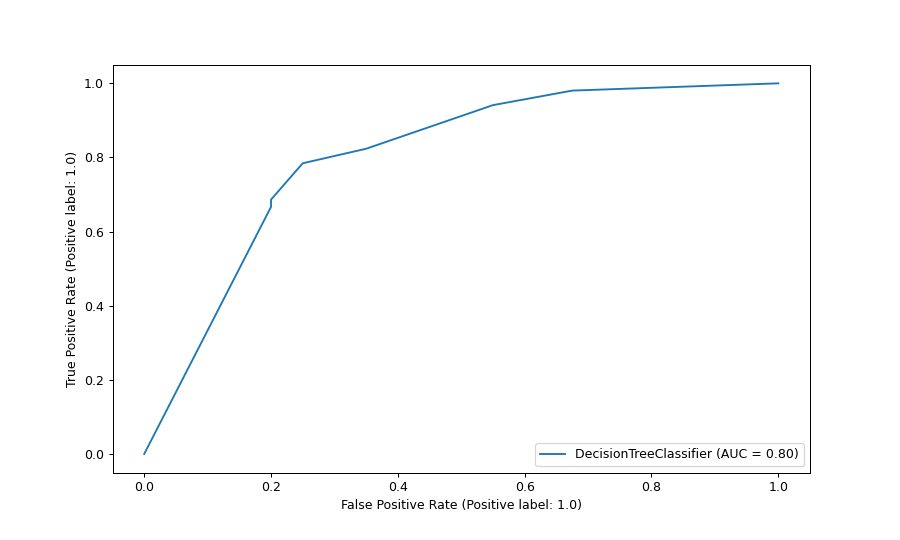

In [131]:
plot_roc_curve(cart_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


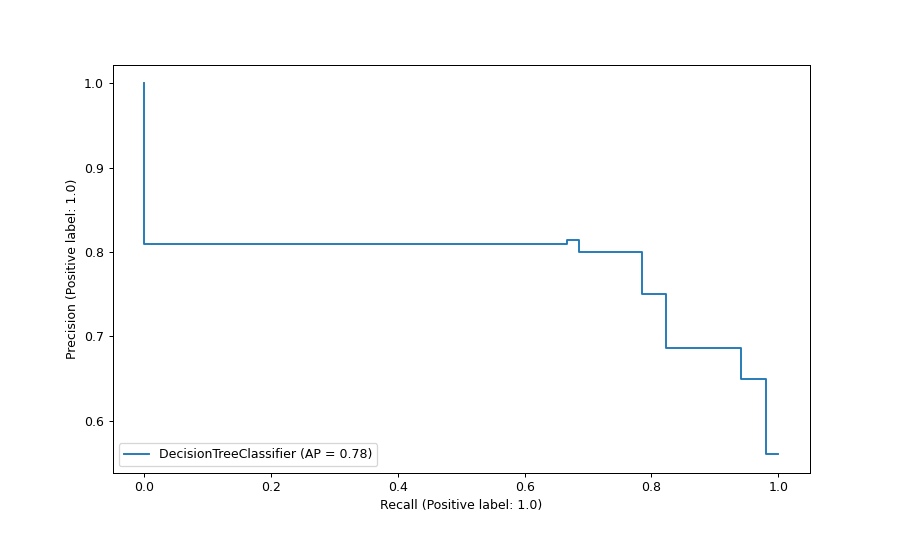

In [132]:
plot_precision_recall_curve(cart_tuned, X_test_scaled, y_test);

## Implement RandomForest and Evaluate

In [133]:
# RandomForest Classification
rf_model = RandomForestClassifier(random_state = 42).fit(X_train_scaled, y_train)
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,500,1000],
             "min_samples_split": [2,5,10]}

rf_gridCV = GridSearchCV(rf_model, 
                         rf_params, 
                         cv = 10, 
                         n_jobs = -1, 
                         verbose = 2).fit(X_train_scaled, y_train)


max_depth, max_features, min_samples_split, n_estimators = rf_gridCV.best_params_["max_depth"], rf_gridCV.best_params_["max_features"], rf_gridCV.best_params_["min_samples_split"], rf_gridCV.best_params_["n_estimators"]

rf_tuned = RandomForestClassifier(max_depth = max_depth, 
                                  max_features = max_features, 
                                  min_samples_split = min_samples_split,
                                  n_estimators = n_estimators).fit(X_train_scaled, y_train)
y_test_pred = rf_tuned.predict(X_test_scaled)


print("best_score:", rf_gridCV.best_score_, '\n')
print('max_depth:', max_depth, 'min_samples_split:', min_samples_split, 'n_estimators:', n_estimators)
print('accuracy:', accuracy_score(y_test, y_test_pred))
print('rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)), '\n\n')

rf_conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
rf_conf_matrix.columns = pd.MultiIndex.from_product([rf_conf_matrix.columns, ['for rf']])

rf = get_classification_report(y_test, y_test_pred)
rf.columns = pd.MultiIndex.from_product([rf.columns, ['for rf']])
print('confusion_matrix:\n\n', rf_conf_matrix, '\n\n')
print('classification_report:\n\n', rf)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Score:0.8857142857142858
best_score: 0.8857142857142858 

max_depth: 2 min_samples_split: 2 n_estimators: 500
accuracy: 0.8571428571428571
rmse: 0.3779644730092272 


confusion_matrix:

        0      1
  for rf for rf
0     31      9
1      4     47 


classification_report:

              precision recall f1-score support
                for rf for rf   for rf  for rf
0.0              0.886  0.775    0.827  40.000
1.0              0.839  0.922    0.879  51.000
accuracy         0.857  0.857    0.857   0.857
macro avg        0.863  0.848    0.853  91.000
weighted avg     0.860  0.857    0.856  91.000


<IPython.core.display.Javascript object>


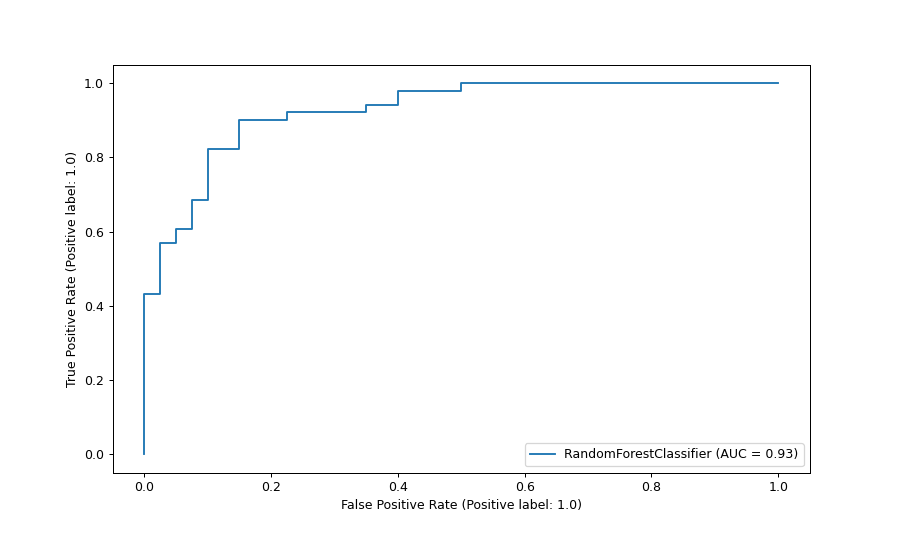

In [136]:
plot_roc_curve(rf_tuned , X_test_scaled, y_test);

<IPython.core.display.Javascript object>


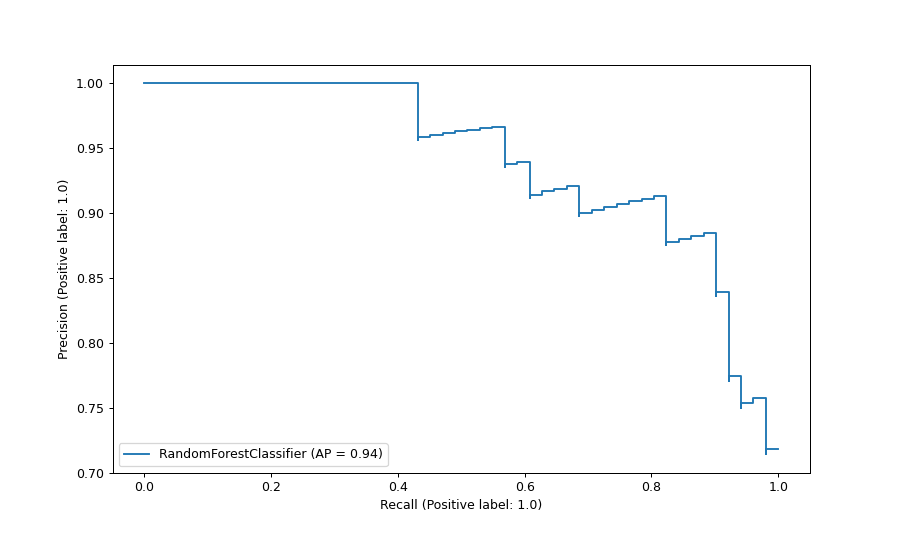

In [137]:
plot_precision_recall_curve(rf_tuned, X_test_scaled, y_test);

# Chose best model and make a random prediction

In [145]:
# models_by_conf_matrix = pd.concat([log_conf_matrix, knn_conf_matrix1, knn_conf_matrix2, knn_conf_matrix3, svm_conf_matrix, cart_conf_matrix, rf_conf_matrix], axis = 1)
# models_by_conf_matrix

,0,1,0,1,0,1,0,1,0,1,0,1,0,1
,for log,for log,for knn,for knn,for knn,for knn,for knn,for knn,for svm,for svm,for cart,for cart,for rf,for rf
0,28,12,30,10,30,10,30,10,28,12,30,10,31,9
1,7,44,10,41,10,41,10,41,7,44,11,40,4,47


In [146]:
# models_by_classificationReport = pd.concat([log[1,2] ,knn1, knn2, knn3, svm, cart, rf], axis = 1)
# models_by_classificationReport

,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
,for log,for log,for log,for log,for knn,for knn,for knn,for knn,for knn,for knn,for knn,for knn,for knn,for knn,for knn,for knn,for svm,for svm,for svm,for svm,for cart,for cart,for cart,for cart,for rf,for rf,for rf,for rf
0.0,0.800,0.700,0.747,40.000,0.750,0.750,0.750,40.000,0.750,0.750,0.750,40.000,0.750,0.750,0.750,40.000,0.800,0.700,0.747,40.000,0.732,0.750,0.741,40.000,0.886,0.775,0.827,40.000
1.0,0.786,0.863,0.822,51.000,0.804,0.804,0.804,51.000,0.804,0.804,0.804,51.000,0.804,0.804,0.804,51.000,0.786,0.863,0.822,51.000,0.800,0.784,0.792,51.000,0.839,0.922,0.879,51.000
accuracy,0.791,0.791,0.791,0.791,0.780,0.780,0.780,0.780,0.780,0.780,0.780,0.780,0.780,0.780,0.780,0.780,0.791,0.791,0.791,0.791,0.769,0.769,0.769,0.769,0.857,0.857,0.857,0.857
macro avg,0.793,0.781,0.785,91.000,0.777,0.777,0.777,91.000,0.777,0.777,0.777,91.000,0.777,0.777,0.777,91.000,0.793,0.781,0.785,91.000,0.766,0.767,0.766,91.000,0.863,0.848,0.853,91.000
weighted avg,0.792,0.791,0.789,91.000,0.780,0.780,0.780,91.000,0.780,0.780,0.780,91.000,0.780,0.780,0.780,91.000,0.792,0.791,0.789,91.000,0.770,0.769,0.770,91.000,0.860,0.857,0.856,91.000


In [151]:
#best scores
rf

,precision,recall,f1-score,support
,for rf,for rf,for rf,for rf
0.0,0.886,0.775,0.827,40.000
1.0,0.839,0.922,0.879,51.000
accuracy,0.857,0.857,0.857,0.857
macro avg,0.863,0.848,0.853,91.000
weighted avg,0.860,0.857,0.856,91.000
